# Quantum circuit construction of the Markovian evolution of two identical quantum emitters coupled to a plasmonic nanocavity


## Starting point: The Markovian Master Equation


The Markovian master equation (ME) for two TLSs reads


\begin{align*}
\frac{d\rho_S}{dt} = -i[H_S + H_{LS}, \rho_S] + \sum_{i = 0}^{1} \mathcal{D}_{i} [\rho_S] + \mathcal{D}_{01} [\rho_S]
\end{align*} 


where



\begin{align*}
H_S + H_{LS} = \sum_{i = 0}^{1} \left[ \omega_i + \Delta^{(i)}  \left( \frac{g_i^2}{\left( \frac{\kappa}{2}\right)^2 + (\Delta^{(i)})^2}\right)\right] \sigma_i^{\dag} \sigma_i + \bar{\Delta} \frac{2g_0g_1 }{\left(\frac{\kappa}{2}\right)^2 + (\bar{\Delta})^2} \left( \sigma_0^{\dag} \sigma_1 + \sigma_0 \sigma_1^{\dag} \right)
\end{align*} 



\begin{align*}
\mathcal{D}_{i} [\rho_S] = \left( \gamma_i + \kappa  \frac{g_i^2}{\left( \frac{\kappa}{2}\right)^2 + (\Delta^{(i)})^2} \right) \left( \sigma_i \rho_S \sigma_i^{\dag} - \frac{1}{2} \left\lbrace \sigma_i^{\dag} \sigma_i, \rho_S \right\rbrace \right)
\end{align*} 



\begin{align*}
\mathcal{D}_{01} [\rho_S] = \left(  \kappa\frac{g_0g_1}{\left( \frac{\kappa}{2}\right)^2 + (\bar{\Delta})^2} \right) \left( \sigma_0 \rho_S \sigma_1^{\dag} - \frac{1}{2} \left\lbrace \sigma_1^{\dag} \sigma_0, \rho_S \right\rbrace \right)
\end{align*} 



\begin{align*}
\mathcal{D}_{10} [\rho_S] = \left( \kappa \frac{ g_0g_1}{\left( \frac{\kappa}{2}\right)^2 + (\bar{\Delta})^2} \right) \left( \sigma_1 \rho_S \sigma_0^{\dag} - \frac{1}{2} \left\lbrace \sigma_0^{\dag} \sigma_1, \rho_S \right\rbrace \right)
\end{align*} 


with $\Delta^{(i)} \equiv \omega_i - \omega_c$ and $\bar{\Delta} \equiv (\omega_0 + \omega_1)/ 2 - \omega_c$ the detunings of each emitter and the mean detuning, respectively. 

Defining the effective variables $\tilde{\omega}_i \equiv \omega_i + \Delta^{(i)} \left( \frac{g_i^2  }{\left( \frac{\kappa}{2}\right)^2 + (\Delta^{(i)})^2}\right)$, $\tilde{g} \equiv \bar{\Delta} \frac{2g_0g_1 }{\left(\frac{\kappa}{2}\right)^2 + (\bar{\Delta})^2}$, $\tilde{\gamma}_i \equiv \gamma_i + \kappa\frac{g_i^2 }{\left( \frac{\kappa}{2}\right)^2 + (\Delta^{(i)})^2}$, $\gamma_{01} \equiv \kappa 
\frac{ g_0g_1 }{\left( \frac{\kappa}{2}\right)^2 + (\bar{\Delta})^2}$ we can rewrite the ME as 

$$ 
\begin{align*}
\frac{d\rho_S}{dt} =& -i\left[\sum_{i=0}^1 \tilde{\omega}_i \sigma_i^{\dag} \sigma_i + \tilde{g} \left(\sigma_0^{\dag} \sigma_1 + \sigma_0 \sigma_1^{\dag} \right), \rho_S \right] + 
\sum_{i=0}^1 \tilde{\gamma}_i \left( \sigma_i \rho_S \sigma_i^{\dag} - \frac{1}{2} \left\lbrace \sigma_i^{\dag} \sigma_i, \rho_S \right\rbrace \right) +
 \gamma_{01} \left( \sigma_0 \rho_S \sigma_1^{\dag} - \frac{1}{2} \left\lbrace \sigma_1^{\dag} \sigma_0, \rho_S \right\rbrace  + \sigma_1 \rho_S \sigma_0^{\dag} - \frac{1}{2} \left\lbrace \sigma_0^{\dag} \sigma_1, \rho_S \right\rbrace \right)
\end{align*} 
$$

As done in the previous notebook `01_one_emitter_and_one_cavity.ipynb`, from now on we will refer to $\rho_S$ as $\rho$ for simplicity and clarity purposes.

The two main differences between the ME for the single emitter case and this one are (1) the effective coupling between the emitters through $\tilde{g}$ and (2) the cross dissipation term $\gamma_{01}$. The first one goes into the Hamiltonian part of the circuit so we should not have much of a problem dealing with it. The second one, though, cannot be approached as of now with our previous quantum channel approach, since this dissipator is NOT in __Lindblad form__ (see [2](#references))

\begin{align*}
\mathcal{D} [\rho] = \sum_{i} L_i \rho L_i^{\dag} - \frac{1}{2} \left\lbrace L_i^{\dag} L_i, \rho \right\rbrace

\end{align*}

so its definition in term of single qubit decays is not clear at all. 

In order to rewrite the dissipator into something that ressembles the diagonal Lindblad form, we could try finding the basis where the superoperator $\mathcal{D}_{01}$ is diagonal and hopefully decompose the channel into a composition of (simpler) single qubit ones. However $\mathcal{D}$ is a superoperator so this would imply diagonalizing a $(2^2)^2$ square matrix just for two qubits, which is computationally heavy, specially for increasing $n$. So as a first approach, let's try a simpler diagonalization: the diagonalization of  $H$. 

At a first glance, this should not solve any of our problems since $H$ does not share eigenbasis with $\mathcal{D}_{01}$ so, at most, we will only be able to write part of $\mathcal{D}_{01}$ in diagonal form, with some leftovers cross-terms still. Nevertheless, the usefulness of this method will become relevant later on.

## Diagonalization of H

The total system Hamiltonian can be expressed in the computational basis (uncoupled basis) $\left\lbrace \ket{00}, \ket{01}, \ket{10}, \ket{11} \right\rbrace$ $\left(\left\lbrace \ket{gg}, \ket{ge}, \ket{eg}, \ket{ee} \right\rbrace \right)$ as the matrix

$$ 
\begin{align}
H = \begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & \tilde{\omega_1} & \tilde{g} & 0 \\ 
0 & \tilde{g} & \tilde{\omega_0} & 0 \\
0 & 0 & 0 & \tilde{\omega_0} + \tilde{\omega_1}
\end{pmatrix}
\end{align}

Diagonalization of $H$ yields the following eigenvalues and eigenvectors:

$$ 
\begin{align*}
\lambda_1 = 0 \rightarrow v_1 = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} 
\end{align*} 
$$

$$ 
\begin{align*}
\lambda_2 = \frac{\tilde{\omega}_0 + \tilde{\omega}_1}{2} - \Lambda \rightarrow v_2 = \begin{pmatrix} 0 \\ - \sin \theta \\ \cos \theta \\ 0 \end{pmatrix} 
\end{align*} 
$$

$$ 
\begin{align*}
\lambda_3 = \frac{\tilde{\omega}_0 + \tilde{\omega}_1}{2} + \Lambda \rightarrow v_2 = \begin{pmatrix} 0 \\ \cos \theta \\ \sin \theta \\ 0 \end{pmatrix} 
\end{align*} 
$$

$$ 
\begin{align*}
\lambda_4 = \tilde{\omega}_0 + \tilde{\omega}_1 \rightarrow v_4 = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} 
\end{align*} 
$$

where we have defined the variables $\delta \equiv \tilde{\omega}_0 - \tilde{\omega}_1$, $2\Lambda = \sqrt{4\tilde{g}^2 + \delta^2}$  following the notation in [1](#references). The angle $\theta$ satisfies $\sin \theta = \frac{g}{\sqrt{\Lambda(2 \Lambda + \delta)}} $ and $\cos \theta = \sqrt{\frac{2\Lambda + \delta}{4\Lambda}}$.

Identifying $v_1, v_2, v_3, v_4$ as matrix representations of $\ket{G}, \ket{\Lambda_-}, \ket{\Lambda_+}, \ket{E}$, respectively, we get the following (normalized) transformation equations between the computational and the coupled basis:


$$ 
\begin{align*}
\ket{G} &= \ket{00} \\
\ket{\Lambda_-} &= - \sin \theta \ket{01} + \cos \theta \ket{10} \\
\ket{\Lambda_+} &= \cos \theta \ket{01} + \sin \theta \ket{10}  \\
\ket{E} &= \ket{11}
\end{align*} 
$$

In the particular case $\tilde{\omega}_0 = \tilde{\omega}_1 = \tilde{\omega}$, $\cos \theta = \sin \theta  = \frac{1}{\sqrt{2}}$ and the transformation equations from the computational to the coupled basis simplify to

$$ 
\begin{align*}
\ket{00} &= \ket{G} \\
\ket{01} &= \frac{1}{\sqrt{2}} \left( \ket{\Lambda_+} - \ket{\Lambda_-} \right) \\
\ket{10} &= \frac{1}{\sqrt{2}} \left( \ket{\Lambda_-} + \ket{\Lambda_+} \right) \\
\ket{11} &= \ket{E}
\end{align*} 
$$

For this initial derivation, we will assume that __both emitters are identical__ (same $\omega$ and $\gamma$) and that they are __coupled with same strength to the cavity__ (same $g$). Under these assumptions we ensure that $\tilde{\omega}_0 = \tilde{\omega}_1$ is fulfilled and so we can use the simplified transformation equations above.

In the next notebook, we will see how to generalize the calculations done here for non-identical emitters.

## Rewriting the dissipators

First we rewrite the $\sigma_i$ operators into this basis:

$$ 
\begin{align*}
\sigma_0 \equiv \sigma \otimes \mathbf{1} = \ket{0}\bra{1} \otimes (\ket{0}\bra{0} + \ket{1}\bra{1}) = \ket{00} \bra{10} + \ket{01} \bra{11}  = \\
= \frac{1}{\sqrt{2}} \ket{G} \left( \bra{\Lambda_-} + \bra{\Lambda_+} \right) + \frac{1}{\sqrt{2}} \left( \ket{\Lambda_+} - \ket{\Lambda_-} \right) \bra{E} \equiv \frac{1}{\sqrt{2}} \left( \sigma_{\text{G+}} +  \sigma_{\text{G-}} + \sigma_{\text{+E}} - \sigma_{\text{-E}} \right)
\end{align*} 
$$

$$ 
\begin{align*}
\sigma_1 \equiv \sigma \otimes \mathbf{1} \equiv \frac{1}{\sqrt{2}} \left( \sigma_{\text{G+}} -  \sigma_{\text{G-}} + \sigma_{\text{+E}} + \sigma_{\text{-E}} \right)
\end{align*} 
$$

where we have defined the lowering operators in the coupled basis $\sigma_{ij} = \ket{i}\bra{j}$, for $i,j = G, -, +, E$.

With this, we can rewrite the individual dissipators as follows

$$ 
\begin{align*}
\mathcal{D}_0 [\rho] = \tilde{\gamma}_0 \left( \sigma_0 \rho \sigma_0^{\dag} - \frac{1}{2} \left\lbrace \sigma_0^{\dag} \sigma_0, \rho \right\rbrace \right) = \\
= \frac{\tilde{\gamma_0}}{2} \left[ \left( \sigma_{\text{G+}} +  \sigma_{\text{G-}} + \sigma_{\text{+E}} - \sigma_{\text{-E}} \right) \rho \left( \sigma_{\text{G+}}^{\dag} +  \sigma_{\text{G-}}^{\dag} + \sigma_{\text{+E}}^{\dag} - \sigma_{\text{-E}}^{\dag} \right) - \frac{1}{2} \left\lbrace \left( \sigma_{\text{G+}}^{\dag} +  \sigma_{\text{G-}}^{\dag} + \sigma_{\text{+E}}^{\dag} - \sigma_{\text{-E}}^{\dag} \right)\left( \sigma_{\text{G+}} +  \sigma_{\text{G-}} + \sigma_{\text{+E}} - \sigma_{\text{-E}} \right), \rho \right\rbrace \right] \equiv \\
\equiv \frac{\tilde{\gamma}_0}{2} \left( \mathcal{D}_{\text{G+}} [\rho] + \mathcal{D}_{\text{G-}} [\rho] + \mathcal{D}_{\text{+E}} [\rho] + \mathcal{D}_{\text{-E}} [\rho] + \mathcal{D}_{\text{G+, +E}} [\rho] + \mathcal{D}_{\text{+E, G+}} [\rho] - \mathcal{D}_{\text{G-, -E}} [\rho] - \mathcal{D}_{\text{-E,G-}} [\rho]\right)
\end{align*} 
$$

$$ 
\begin{align*}
\mathcal{D}_1 [\rho] = \tilde{\gamma}_1 \left( \sigma_1 \rho \sigma_1^{\dag} - \frac{1}{2} \left\lbrace \sigma_1^{\dag} \sigma_1, \rho \right\rbrace \right) \equiv \\
\equiv \frac{\tilde{\gamma}_1}{2} \left( \mathcal{D}_{\text{G+}} [\rho] + \mathcal{D}_{\text{G-}} [\rho] + \mathcal{D}_{\text{+E}} [\rho] + \mathcal{D}_{\text{-E}} [\rho] + \mathcal{D}_{\text{G+, +E}} [\rho] + \mathcal{D}_{\text{+E, G+}} [\rho] - \mathcal{D}_{\text{G-, -E}} [\rho] - \mathcal{D}_{\text{-E,G-}} [\rho]\right)
\end{align*} 
$$

where $\mathcal{D}_{\alpha, \beta} [\rho] \equiv \sigma_{\alpha}\rho \sigma_{\beta}^{\dag} - \frac{1}{2}\left\lbrace \sigma_{\beta}^{\dag} \sigma_{\alpha}, \rho \right\rbrace $. If only $\alpha$ is specified, it means $\beta = \alpha$ (diagonal dissipators).

For the cross dissipators,

$$ 
\begin{align*}
\mathcal{D}_{01} [\rho] + \mathcal{D}_{10} [\rho] = \gamma_{01} \left( \sigma_0 \rho \sigma_1^{\dag} - \frac{1}{2} \left\lbrace \sigma_1^{\dag} \sigma_0, \rho \right\rbrace  + \sigma_1 \rho \sigma_0^{\dag} - \frac{1}{2} \left\lbrace \sigma_0^{\dag} \sigma_1, \rho \right\rbrace \right) = \\
= \tilde{\gamma}_{01}\left( \mathcal{D}_{\text{G+}} [\rho] - \mathcal{D}_{\text{G-}} [\rho] + \mathcal{D}_{\text{+E}} [\rho] - \mathcal{D}_{\text{-E}} [\rho] + \mathcal{D}_{\text{G+, +E}} [\rho] + \mathcal{D}_{\text{+E, G+}} [\rho] - \mathcal{D}_{\text{G-, -E}} [\rho] - \mathcal{D}_{\text{-E,G-}} [\rho]\right)
\end{align*} 
$$

The total dissipator in the coupled basis can be written as

$$ 
\begin{align*}
\mathcal{D} [\rho] = \mathcal{D}_0 [\rho] + \mathcal{D}_1 [\rho] + \mathcal{D}_{01} [\rho] + \mathcal{D}_{10} [\rho] \equiv \\
\equiv \gamma_+ \left( \mathcal{D}_{\text{G+}} [\rho] + \mathcal{D}_{\text{+E}} [\rho] \right) + \gamma_- \left( \mathcal{D}_{\text{G-}} [\rho]  + \mathcal{D}_{\text{-E}} [\rho] \right) + \gamma_+ \left( \mathcal{D}_{\text{G+, +E}} [\rho] + \mathcal{D}_{\text{+E, G+}} [\rho] \right) - \gamma_- \left( \mathcal{D}_{\text{G-, -E}} [\rho] + \mathcal{D}_{\text{-E,G-}} [\rho]\right)
\end{align*} 
$$

where $\gamma_{\pm} \equiv \frac{\tilde{\gamma}_0 + \tilde{\gamma}_1}{2} \pm \gamma_{01}$ represents the decay rates of the transitions ending or starting at $\ket{\Lambda_{\pm}}$

## Simulations with just the diagonal dissipators

The function `solve_master_equation` in `ME_methods_comparison.py` solves the time evolution in three ways: `original` (solves the full ME with the cavity), `markovian` (solves the Markovian ME with the effective removal of the cavity), `diagonal` (solves the Markovian ME in the coupled basis, considering exclusively the four diagonal dissipators $\mathcal{D}_{\text{G+}} [\rho], \mathcal{D}_{\text{+E}} [\rho], \mathcal{D}_{\text{G-}} [\rho]  + \mathcal{D}_{\text{-E}} [\rho]$). We see that `diagonal` and `markovian` yield the same results for identical emitters.

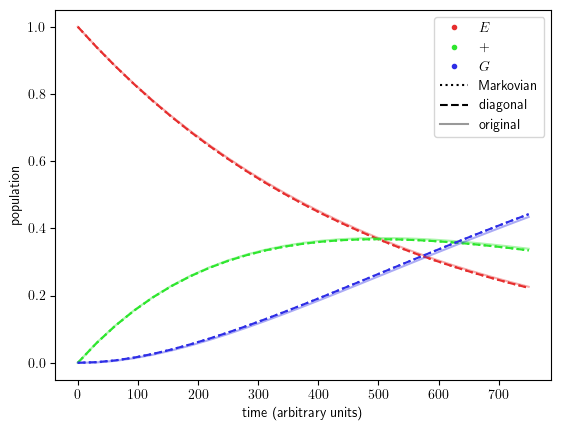

In [11]:
from deprecated_functions.ME_methods_comparison import solve_master_equation
import numpy as np
from utils.generate_complementary_colors import generate_complementary_colors

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

omega_m = [1.2, 1.2]
omega_c = 1.1
gamma = [0.8*(10**-6), 0.8*(10**-6)]
kappa = [0.2]
g = [0.01, 0.01]
t = np.linspace(0, 750, 25)
initial_state = [0, 0, 0, 1] # Coordinates in computational basis
types = ['original', 'markovian', 'diagonal']

evs_original = solve_master_equation(omega_m, omega_c, gamma, kappa, g, t, initial_state, 'original')
evs_markovian = solve_master_equation(omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')
evs_diagonal = solve_master_equation(omega_m, omega_c, gamma, kappa, g, t, initial_state, 'diagonal')

labels = ['E', '+', 'G']
colors = generate_complementary_colors(len(labels), palette_type='default')
counter  = 0

for l in labels:

    plt.plot(t, evs_original[l], linestyle = 'solid', color = colors[counter], alpha = 0.4)
    plt.plot(t, evs_markovian[l], linestyle = 'dotted', color = colors[counter])
    plt.plot(t, evs_diagonal[l], linestyle = 'dashed', color = colors[counter])

    plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = '.', color = colors[counter], label = '$%s$' %l)
    counter = counter + 1

plt.plot(np.NaN, np.NaN, linestyle = 'dotted', color = 'black', label = 'Markovian')
plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', label = 'diagonal')
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'original', alpha = 0.4)
#plt.plot(t, evs_markovian['E'] + evs_markovian['+'] + evs_diagonal['G'])

plt.ylabel('population')
plt.xlabel('time (arbitrary units)')
plt.legend()
#plt.savefig('figures/classical_simulation_without_cross_dissipators.png', bbox_inches='tight')
plt.show()

Now, why is this? When studying population dynamics, the observables of interests are the projectors $\sigma^{\dag}_i \sigma_i = \left| 1 \right>_i \left< 1 \right|_i$. The expectation value of these observables can be expressed in term of the matrix elements of the reduced density operator $\rho$. For example, for this initial case of two identical emitters,

\begin{align*}
\left< \sigma_0^{\dag} \sigma_0 \right> \equiv \mathrm{Tr} \left(  \sigma_0^{\dag} \sigma_0 \rho \right) = \mathrm{Tr} \left( \left[ \sigma^{\dag}\sigma \otimes \mathbf{1} \right] \rho \right) = 
\mathrm{Tr} \left( \left[ \left| 10 \right> \left< 10 \right| + \left| 11 \right> \left< 11 \right| \right] \rho \right) = \\
=\sum_{i \in \{ G, \Lambda_-, \Lambda_+, E \}} \left< i \right| \left( \left[ \frac{1}{2} \left( \left| \Lambda_+ \right> \left<\Lambda_+  \right| + \left| \Lambda_+ \right> \left<\Lambda_-  \right| + \left| \Lambda_- \right> \left<\Lambda_+  \right| + \left| \Lambda_- \right> \left<\Lambda_-  \right|\right) + \left| E \right> \left< E \right| \right] \rho \right) \left| i \right> = \\
= \frac{1}{2} \left( \rho'_{22} + \rho'_{12} + \rho'_{21} + \rho'_{11} \right) + \rho'_{33}
\end{align*}

\begin{align*}
\left< \sigma_1^{\dag} \sigma_1 \right> \equiv \mathrm{Tr} \left(  \sigma_1^{\dag} \sigma_1 \rho_S \right) = \\
=\sum_{i \in \{ G, \Lambda_-, \Lambda_+, E \}} \left< i \right| \left( \left[ \frac{1}{2} \left( \left| \Lambda_+ \right> \left<\Lambda_+  \right| - \left| \Lambda_+ \right> \left<\Lambda_-  \right| - \left| \Lambda_- \right> \left<\Lambda_+  \right| + \left| \Lambda_- \right> \left<\Lambda_-  \right|\right) + \left| E \right> \left< E \right| \right] \rho_S \right) \left| i \right> = \\
= \frac{1}{2} \left( \rho'_{22} - \rho'_{12} - \rho'_{21} + \rho'_{11} \right) + \rho'_{33}
\end{align*}

where $\rho' = P^{\dag} \rho P$ is the reduced density operator in the coupled basis and the indeces $i,j$ in $\rho'_{ij}$ run from 0 to 3.

Even though these expectation values for both emitters do depend on off-diagonal elements of the density operator, simple matrix multiplication (below) shows that these ones in particular are NOT affected whatsoever by any of the four off-diagonal dissipators that we omitted in our simulations, therefore explaning why these are not needed for succesful depictions of population dynamics.

$$ 
\begin{align*}
\mathcal{D}_{\text{G+, +E}} [\rho'] = \sigma_{G+}\rho' \sigma_{+E}^{\dag} - \frac{1}{2}\left\lbrace \sigma_{+E}^{\dag} \sigma_{G+}, \rho' \right\rbrace \rightarrow 
\begin{pmatrix} 0 & 0 & \rho'_{23} & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix}
\end{align*}

$$ 
\begin{align*}
\mathcal{D}_{\text{+E, G+}} [\rho'] \rightarrow 
\begin{pmatrix} 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ \rho'_{32
} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix}
\end{align*}

$$ 
\begin{align*}
\mathcal{D}_{\text{G-, -E}} [\rho'] \rightarrow 
\begin{pmatrix} 0 & \rho'_{13} & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix}
\end{align*}

$$ 
\begin{align*}
\mathcal{D}_{\text{-E, G-}} [\rho'] \rightarrow 
\begin{pmatrix} 0 & 0 & 0 & 0 \\ \rho'_{31} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix}
\end{align*}

We can also arrive to the same conclusion by following more analytically explicit calculations. Ignoring the Hamiltonian evolution, and considering just the evolution of $\rho$ under these off-diagonal dissipators,

\begin{align*}
\frac{d \rho}{dt} = \gamma_{+} \left( \mathcal{D}_{\text{G+, +E}} \left[ \rho \right] +  \mathcal{D}_{\text{+E,G+}} \left[ \rho \right] \right) + \gamma_{-} \left( \mathcal{D}_{\text{G-, -E}} \left[ \rho \right] +  \mathcal{D}_{\text{-E, G-}} \left[ \rho \right] \right)
\end{align*}

which can be expressed in matrix form in the coupled basis as

\begin{align*}
\frac{d}{dt} \begin{pmatrix} \rho'_{00} & \rho'_{01} & \rho'_{02} & \rho'_{03} \\ \rho'_{10} & \rho'_{11} & \rho'_{12} & \rho'_{13} \\ \rho'_{20} & \rho'_{21} & \rho'_{22} & \rho'_{23} \\ \rho'_{30} & \rho'_{31} & \rho'_{32} & \rho'_{33} \end{pmatrix} = \begin{pmatrix} 0 & \gamma_-\rho'_{13} & \gamma_+ \rho'_{23} & 0 \\ \gamma_-\rho'_{31} & 0 & 0 & 0 \\ \gamma_+ \rho'_{32} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \end{pmatrix}.
\end{align*}

This yields a set of four differential equations for some matrix elements of $\rho$ 

\begin{cases}
\frac{d \rho'_{01}}{dt} = \gamma_- \rho'_{13} \\
\frac{d \rho'_{10}}{dt} = \gamma_- \rho'_{31} \\
\frac{d \rho'_{02}}{dt} = \gamma_+ \rho'_{23} \\
\frac{d \rho'_{20}}{dt} = \gamma_+ \rho'_{32}
\end{cases},

showing how these dissipators only affect those four, leaving the other matrix elements unchanged. As a result of this, we can construct this initial quantum circuit considering only the four diagonal dissipators.

## Quantum circuit for two identical emitters

The four diagonal dissipators $\gamma_+ \left( \mathcal{D}_{\text{G+}} [\rho] + \mathcal{D}_{\text{+E}} [\rho] \right), \gamma_- \left( \mathcal{D}_{\text{G-}} [\rho]  + \mathcal{D}_{\text{-E}} [\rho] \right)$ represent the four possible decay paths in the coupled basis: $\left| \Lambda_+ \right> \to \left| G \right> $, $\left| E \right> \to \left| \Lambda_+ \right> $, $\left| \Lambda_- \right> \to \left| G \right> $, $\left| E \right> \to \left| \Lambda_- \right> $, As a result and due to them being in Lindblad form, one could apply the same producedure as in the previous notebook and define four (decay) channels in the enlarged Hilbert space $\mathcal{H}_{S} \otimes \mathcal{H}_E$: $\varepsilon_{\text{G+}}$, $\varepsilon_{\text{+E}}$, $\varepsilon_{\text{G-}}$, $\varepsilon_{\text{-E}}$ with transformation equations

\begin{align*}
\left| G \right>_S \otimes \left|0 \right>_E &\to \left| G \right>_S \otimes \left|0 \right>_E \\
\left| \Lambda_+ \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_+} \left| \Lambda_+ \right>_S \otimes \left|0 \right>_E +  \sqrt{p_+} \left| G \right>_S \otimes \left|1 \right>_E
\end{align*}

\begin{align*}
\left| \Lambda_+ \right>_S \otimes \left|0 \right>_E &\to \left| \Lambda_+  \right>_S \otimes \left|0 \right>_E \\
\left| E \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_+} \left| E \right>_S \otimes \left|0 \right>_E +  \sqrt{p_+} \left| \Lambda_+ \right>_S \otimes \left|1 \right>_E
\end{align*}

\begin{align*}
\left| G \right>_S \otimes \left|0 \right>_E &\to \left| G \right>_S \otimes \left|0 \right>_E \\
\left| \Lambda_- \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_-} \left| \Lambda_- \right>_S \otimes \left|0 \right>_E +  \sqrt{p_-} \left| G \right>_S \otimes \left|1 \right>_E
\end{align*}

\begin{align*}
\left| \Lambda_- \right>_S \otimes \left|0 \right>_E &\to \left| \Lambda_-  \right>_S \otimes \left|0 \right>_E \\
\left| E \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_-} \left| E \right>_S \otimes \left|0 \right>_E +  \sqrt{p_-} \left| \Lambda_- \right>_S \otimes \left|1 \right>_E
\end{align*}

with $p_{\pm} \equiv 1 - e^{- \gamma_{\pm}t}$.

Now, assume we apply a basis change $P$ to the system register that transforms the computational basis states into the coupled basis states. Then we can identify $\left| G \right>$ with $\left|00 \right>$, $\left| \Lambda_- \right>$ with $\left| 01 \right>$ and so on. Let's consider the channels $\varepsilon_{\text{G+}}$ and $\varepsilon_{\text{G-}}$. With this identification, the transformation equations in the coupled basis become

\begin{align*}
\left| 00 \right>_S \otimes \left|0 \right>_E &\to \left| 00 \right>_S \otimes \left|0 \right>_E \\
\left| 10 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_+} \left| 10 \right>_S \otimes \left|0 \right>_E +  \sqrt{p_+} \left| 00 \right>_S \otimes \left|1 \right>_E
\end{align*}

\begin{align*}
\left| 00 \right>_S \otimes \left|0 \right>_E &\to \left| 00 \right>_S \otimes \left|0 \right>_E \\
\left| 01 \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_-} \left| 01 \right>_S \otimes \left|0 \right>_E +  \sqrt{p_-} \left| 00 \right>_S \otimes \left|1 \right>_E
\end{align*}

As a result of this basis change, now $\varepsilon_{\text{G+}}$ and $\varepsilon_{\text{G-}}$ can be interpreted as single-qubit decay amplitude damping channels for $q_0$ and $q_1$ with decay probabilities $p_+$ and $p-$, respectively.

On the other hand, $\varepsilon_{\text{+E}}$, $\varepsilon_{\text{-E}}$

\begin{align*}
\left| \Lambda_+ \right>_S \otimes \left|0 \right>_E &\to \left| \Lambda_+  \right>_S \otimes \left|0 \right>_E \\
\left| E \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_+} \left| E \right>_S \otimes \left|0 \right>_E +  \sqrt{p_+} \left| \Lambda_+ \right>_S \otimes \left|1 \right>_E
\end{align*}

\begin{align*}
\left| \Lambda_- \right>_S \otimes \left|0 \right>_E &\to \left| \Lambda_-  \right>_S \otimes \left|0 \right>_E \\
\left| E \right>_S \otimes \left|0 \right>_E &\to \sqrt{1- p_-} \left| E \right>_S \otimes \left|0 \right>_E +  \sqrt{p_-} \left| \Lambda_- \right>_S \otimes \left|1 \right>_E
\end{align*}

can also be interpreted as a type of single-qubit ADCs for $q_0$ and $q_1$, now with probabilities $p_-$ and $p_+$, respectively, with the uninqueness that the control state for the controlled-$Ry$ s is now the two-qubit state $\left| 11 \right>$.

Putting all four channels together, we seek a `QuantumCircuit`that performs ADC-like transformations on $q_0$ and $q_1$ with probabilities $p_-$ and $p_+$ but performs the reverse decays ($q_0$ with $p_+$ and $q_1$ with $p_-$) if the system state is $\left| 11 \right>$. Following a similar idea used on the incoherent pumping and spontaneous decay combined channel, we can achieve this by doing and undoing rotations depending on the control state.

The parametric `QuantumCircuit`implementing said transformations is the following

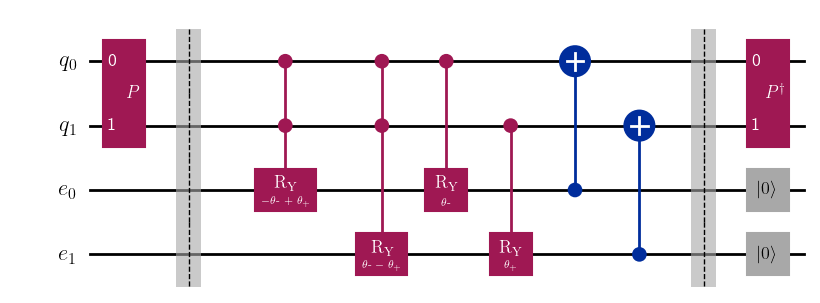

In [1]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter, ControlledGate, Gate
from qiskit.circuit.library import RYGate
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

system = QuantumRegister(2, name = 'q')
environment = QuantumRegister(2, name = 'e')

theta_plus = Parameter('$\\theta_{+} $')
theta_minus = Parameter('$\\theta- $')

# Decay

qc = QuantumCircuit(system, environment)

u_gate = Gate(name = 'P', params = [],num_qubits = 2, label = '$P$')
u_dag_gate = Gate(name = 'Pdag', params = [], num_qubits = 2, label = '$P^{\\dag}$')

qc.append(u_gate, system)
qc.barrier()

ccry_plus = ControlledGate(name = 'ryplus', num_qubits = 3, params = [theta_plus - theta_minus], num_ctrl_qubits= 2, base_gate = RYGate(theta_plus - theta_minus))
ccry_minus = ControlledGate(name = 'ryminus', num_qubits = 3, params = [theta_minus - theta_plus], num_ctrl_qubits= 2, base_gate = RYGate(theta_minus - theta_plus))

qc.append(ccry_plus, [system[0], system[1], environment[0]])

qc.append(ccry_minus, [system[0], system[1], environment[1]])

qc.cry(theta_minus, system[0], environment[0])
qc.cx(environment[0], system[0])
qc.cry(theta_plus, system[1], environment[1])
qc.cx(environment[1], system[1])

qc.barrier()

qc.append(u_dag_gate, system)

qc.reset(environment)

a = qc.draw('mpl')
a.savefig('poster_original_circuit_transparent.png', bbox_inches='tight', transparent = True)
a

with $\theta_{\pm}$ satisfying $\sin \theta_{\pm} = \sqrt{p_{\pm}}$

It is important to note that, due to Qiskit's little endian notation, to achieve the desired transformations we need to swap the probabilities stated before between the qubits. (It is either that, or swapping the two central columns of the basis change gate).

Once the `QuantumCircuit`is defined, three different versions of it come to mind: `regular` (the coupled basis is exclusively used for implementing $\mathcal{D}$), `diagonal` (the whole circuit is in the coupled basis) and `one ancilla` (`regular` but using only one ancilla qubit).

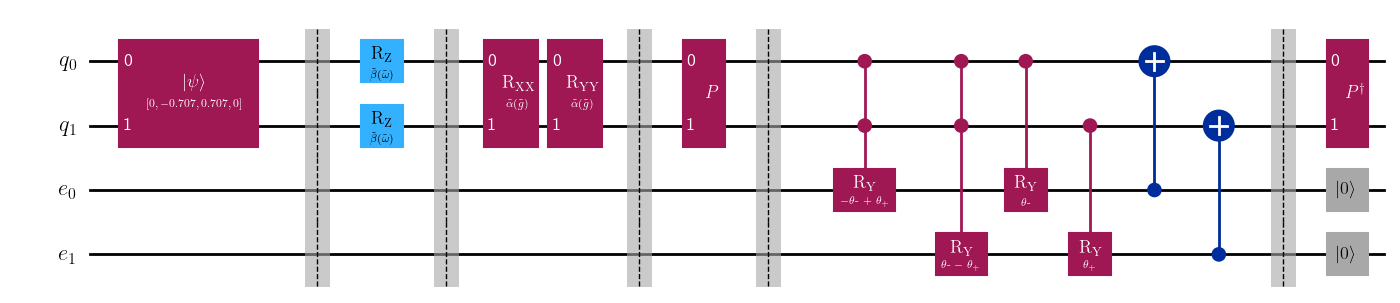

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter, ControlledGate, Gate
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

system = QuantumRegister(2, name = 'q')
environment = QuantumRegister(2, name = 'e')

tilde_alpha = Parameter('$\\tilde{\\alpha} (\\tilde{g})$')
tilde_beta = Parameter('$\\tilde{\\beta} (\\tilde{\\omega})$')
theta_plus = Parameter('$\\theta_{+} $')
theta_minus = Parameter('$\\theta- $')

# Initialization

init = QuantumCircuit(system, environment)
initial_statevector = Statevector([0,-1/np.sqrt(2),1/np.sqrt(2),0]) 
init.initialize(params = initial_statevector, qubits = system, normalize = True)

init.barrier()

# Free evolution

u_0 = QuantumCircuit(system, environment)
u_0.rz(tilde_beta, system)

u_0.barrier()

# Interaction layer

u_int = QuantumCircuit(system, environment)

u_int.rxx(tilde_alpha, qubit1 = system[0], qubit2 = system[1])
u_int.ryy(tilde_alpha, qubit1 = system[0], qubit2 = system[1])

u_int.barrier()

# Decay

u_decay = QuantumCircuit(system, environment)

u_gate = Gate(name = 'P', params = [],num_qubits = 2, label = '$P$')

u_dag_gate = Gate(name = 'Pdag', params = [], num_qubits = 2, label = '$P^{\\dag}$')

u_decay.append(u_gate, system)

u_decay.barrier()

ccry_plus = ControlledGate(name = 'ryplus', num_qubits = 3, params = [theta_plus - theta_minus], num_ctrl_qubits= 2, base_gate = RYGate(theta_plus - theta_minus))

ccry_minus = ControlledGate(name = 'ryminus', num_qubits = 3, params = [theta_minus - theta_plus], num_ctrl_qubits= 2, base_gate = RYGate(theta_minus - theta_plus))

u_decay.append(ccry_plus, [system[0], system[1], environment[0]])

u_decay.append(ccry_minus, [system[0], system[1], environment[1]])

u_decay.cry(theta_minus, system[0], environment[0])
u_decay.cx(environment[0], system[0])
u_decay.cry(theta_plus, system[1], environment[1])
u_decay.cx(environment[1], system[1])

u_decay.barrier()

u_decay.append(u_dag_gate, system)

u_decay.reset(environment)

u = init.compose(u_0).compose(u_int).compose(u_decay)

a = u.draw('mpl')
a.savefig('figures/two_qubit_regular_circuit.png', bbox_inches='tight')
a

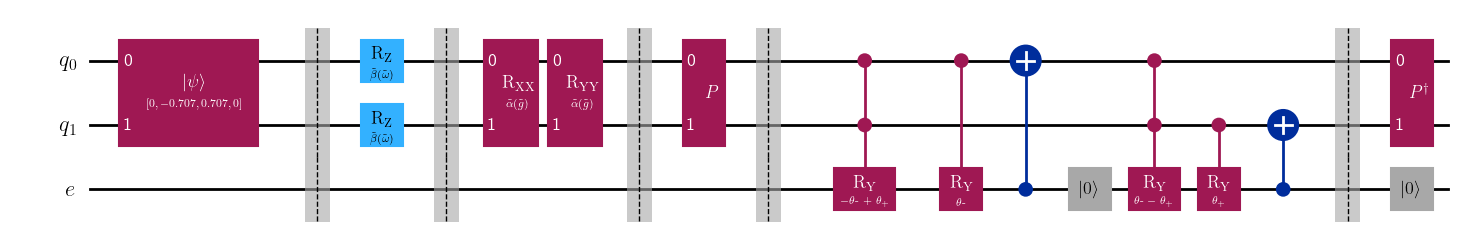

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit import Parameter, ControlledGate, Gate
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import RYGate
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

system = QuantumRegister(2, name = 'q')
environment = QuantumRegister(1, name = 'e')

tilde_alpha = Parameter('$\\tilde{\\alpha} (\\tilde{g})$')
tilde_beta = Parameter('$\\tilde{\\beta} (\\tilde{\\omega})$')
theta_plus = Parameter('$\\theta_{+} $')
theta_minus = Parameter('$\\theta- $')

# Initialization

init = QuantumCircuit(system, environment)
initial_statevector = Statevector([0,-1/np.sqrt(2),1/np.sqrt(2),0]) 
init.initialize(params = initial_statevector, qubits = system, normalize = True)

init.barrier()

# Free evolution

u_0 = QuantumCircuit(system, environment)
u_0.rz(tilde_beta, system)

u_0.barrier()

# Interaction layer

u_int = QuantumCircuit(system, environment)

u_int.rxx(tilde_alpha, qubit1 = system[0], qubit2 = system[1])
u_int.ryy(tilde_alpha, qubit1 = system[0], qubit2 = system[1])

u_int.barrier()

# Decay

u_decay = QuantumCircuit(system, environment)

u_gate = Gate(name = 'P', params = [],num_qubits = 2, label = '$P$')

u_dag_gate = Gate(name = 'Pdag', params = [], num_qubits = 2, label = '$P^{\\dag}$')

u_decay.append(u_gate, system)

u_decay.barrier()

ccry_plus = ControlledGate(name = 'ryplus', num_qubits = 3, params = [theta_plus - theta_minus], num_ctrl_qubits= 2, base_gate = RYGate(theta_plus - theta_minus))

ccry_minus = ControlledGate(name = 'ryminus', num_qubits = 3, params = [theta_minus - theta_plus], num_ctrl_qubits= 2, base_gate = RYGate(theta_minus - theta_plus))

u_decay.append(ccry_plus, [system[0], system[1], environment[0]])

u_decay.cry(theta_minus, system[0], environment[0])

u_decay.cx(environment[0], system[0])

u_decay.reset(environment)

u_decay.append(ccry_minus, [system[0], system[1], environment[0]])

u_decay.cry(theta_plus, system[1], environment[0])

u_decay.cx(environment[0], system[1])

u_decay.barrier()

u_decay.append(u_dag_gate, system)

u_decay.reset(environment)

u = init.compose(u_0).compose(u_int).compose(u_decay)

a = u.draw('mpl')
a.savefig('figures/two_qubit_one_ancilla_circuit.png', bbox_inches='tight')
a


We put the `regular` circuit to the test by measuring the populations of some of the coupled basis states.

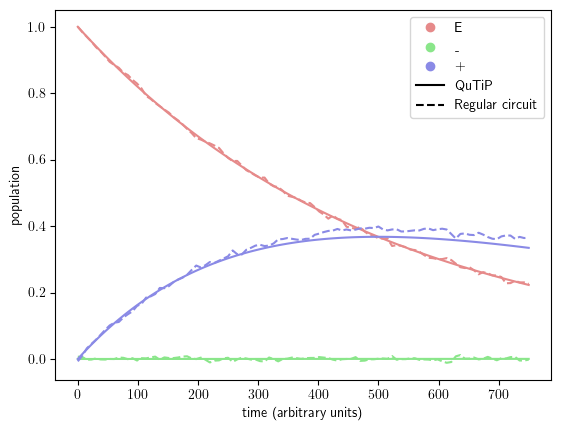

In [1]:
from deprecated_functions.ME_methods_comparison import solve_master_equation
from deprecated_functions.two_qubit_original_circuit import get_circuit
from deprecated_functions.two_qubit_qiskit_solver import two_qubit_estimator_solver
from utils.generate_complementary_colors import generate_complementary_colors
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

from qiskit_aer import AerSimulator

omega_m = [1.2, 1.2]
omega_c = 1.1
gamma = [0.8*(10**-6), 0.8*(10**-6)]
kappa = [0.2]
g = [0.01, 0.01]
t = np.linspace(0, 750, 100)
initial_state = [0, 0, 0, 1] # Coordinates in computational basis
types = ['original', 'markovian', 'diagonal']

evs_diagonal = solve_master_equation(omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')

r = 10
backend = AerSimulator()
optimization_level = 0
options = {'default_shots' : 10**4}

qc = get_circuit(2, omega_m, omega_c, g, gamma, kappa, initial_state, r, 'regular')
evs_qc = two_qubit_estimator_solver(qc, 2, t, backend, optimization_level, options, 'regular')

labels = ['E', '-', '+']

colors = generate_complementary_colors(len(labels), 'pastel')

counter = 0

for l in labels:

    plt.plot(t, evs_diagonal[l], linestyle = 'solid', color = colors[counter])
    plt.plot(t, evs_qc[l], linestyle = 'dashed', color = colors[counter])
    plt.plot(np.NaN, np.NaN, color = colors[counter], marker = 'o', linestyle = 'None', label = f'{l}')
    counter = counter + 1

plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'solid', label = 'QuTiP')
plt.plot(np.NaN, np.NaN, color = 'black', linestyle = 'dashed', label = 'Regular circuit')

plt.ylabel('population')
plt.xlabel('time (arbitrary units)')
plt.legend()
plt.savefig('figures/first_circuit_test.png', bbox_inches='tight')
plt.show()


## References <a id='references'></a>


[1] Juan-Delgado, A., et.al. (2024). Tailoring the statistics of light emitted from two interacting quantum emitters. Physical Review Research.

[2] Daniel Manzano. A short introduction to the Lindblad master equation. AIP Advances 1 February 2020. 10 (2): 025106.